# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares = total_fares/total_rides
avg_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fares_driver = total_fares/total_drivers
avg_fares_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df["Total Rides"] = total_rides
pyber_summary_df["Total Drivers"] = total_drivers
pyber_summary_df["Total Fares"] = total_fares
pyber_summary_df["Average Fare per Ride"] = avg_fares
pyber_summary_df["Average Fare per Driver"] = avg_fares_driver
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"]= pyber_summary_df["Total Rides"].map("{:.0f}".format)
pyber_summary_df["Total Drivers"]= pyber_summary_df["Total Drivers"].map("{:.0f}".format)
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]= pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]= pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_date_df = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
city_date_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
city_date_df = city_date_df.reset_index()
city_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_date_pivot = city_date_df.pivot(index="date",columns="type",values="fare")
city_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
city_date_filtered_df = city_date_pivot.loc['2019-01-01':'2019-04-29']
city_date_filtered_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
city_date_filtered_df.index = pd.to_datetime(city_date_filtered_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
city_date_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
city_date_resampled_df = city_date_filtered_df.resample("W").sum()
city_date_resampled_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


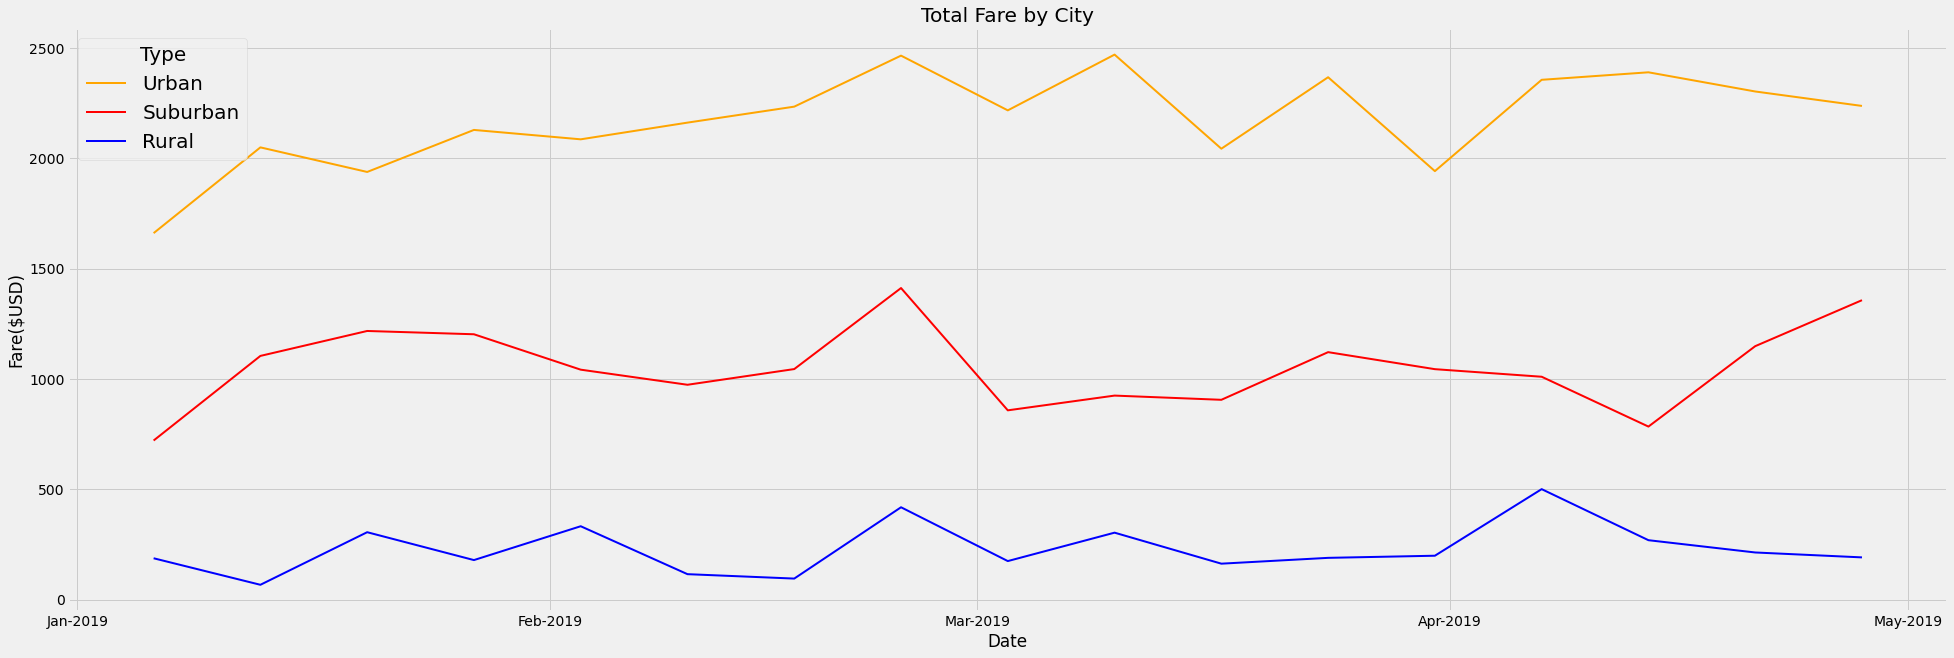

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Place values from df into variables
x_axis = city_date_resampled_df.index
urban_y_axis = city_date_resampled_df["Urban"]
suburban_y_axis = city_date_resampled_df["Suburban"]
rural_y_axis = city_date_resampled_df["Rural"]

# Create subplot and plot variables
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(x_axis, urban_y_axis, color="orange", linewidth=2, label="Urban")  
ax.plot(x_axis, suburban_y_axis, color="red", linewidth=2, label="Suburban") 
ax.plot(x_axis, rural_y_axis, color="blue", linewidth=2, label="Rural")  

# https://matplotlib.org/3.3.3/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py
## set x axis ticks to months 
import matplotlib.dates as mdates  ## get the needed library for handling dates
months = mdates.MonthLocator()  ## use to find months
ax.xaxis.set_major_locator(months) # use ax set_major_locator(). Sets ticks to month 
## format x axis to month plus year format 
month_format = mdates.DateFormatter("%b-%Y")  ## sets format to month- year
ax.xaxis.set_major_formatter(month_format)

# Set labels and titles, and create a legeend 
ax.set_xlabel("Date")
ax.set_ylabel("Fare($USD)")
ax.set_title("Total Fare by City")
lgnd = ax.legend(fontsize="20", mode="Expanded",
         loc="best", title="Type")
lgnd.get_title().set_fontsize(20)

# Save the figure to analysis folder
plt.savefig('analysis/PyBer_fare_summary.png')

In [20]:
pyber_summary_df["Total Rides"] = total_rides
pyber_summary_df["Total Drivers"] = total_drivers
pyber_summary_df["Total Fares"] = total_fares
pyber_summary_df["Average Fare per Ride"] = avg_fares
pyber_summary_df["Average Fare per Driver"] = avg_fares_driver
pyber_summary_df.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object')

# Additional Charts for Analysis

## Bar Charts

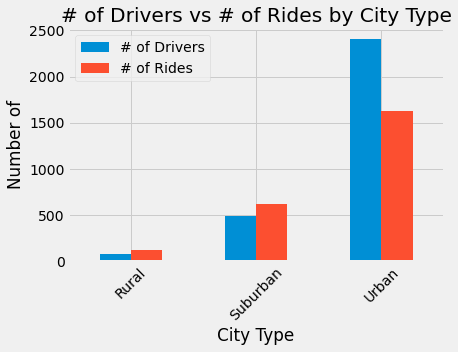

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a dataframe that compares the # of drivers to # of riders
# this is a simple chart that shows where the # of drivers exceeds the # of rides, meaning we have drivers idle, not being used
driver_ride_df = pd.DataFrame({
    "# of Drivers":total_drivers,
    "# of Rides":total_rides})

driver_ride_df.plot(kind='bar')
# Set textual properties
plt.title("# of Drivers vs # of Rides by City Type")
plt.ylabel("Number of")
plt.xlabel("City Type")
plt.xticks(rotation=45)

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

# Save the figure
plt.savefig('analysis/#_drivers_rides.png')

# Scatter Plots

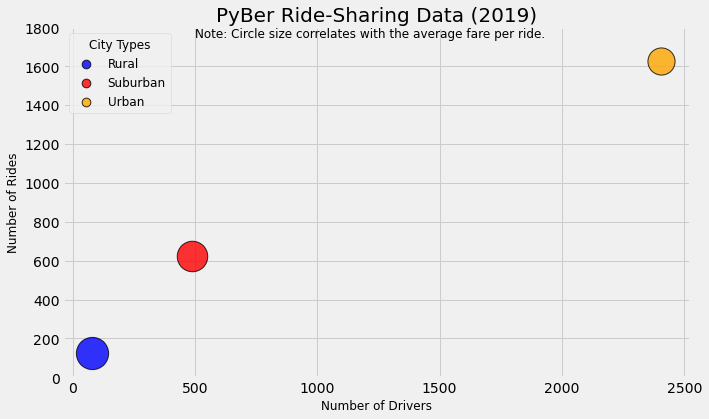

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a DataFrame for each city type for easier analysis
rural_df = pyber_summary_df.loc[(pyber_summary_df.index == "Rural")]
suburban_df = pyber_summary_df.loc[(pyber_summary_df.index == "Suburban")]
urban_df = pyber_summary_df.loc[(pyber_summary_df.index == "Urban")]


# Create a scatter plot that shows # of drivers vs # of rides
# use the average fares per ride as the size of the circles 
# this shows that where the # of drivers (i.e. supply) exceeds the # of rides (i.e. demand) avg fare per ride drops 
# shows how supply and demand impacts pricing 

rural_fare_size = rural_df["Average Fare per Ride"]
suburban_fare_size = suburban_df["Average Fare per Ride"]
urban_fare_size = urban_df["Average Fare per Ride"]

plt.subplots(figsize=(10, 6))
plt.scatter(rural_df["Total Drivers"],
      rural_df["Total Rides"],
      s=30*rural_fare_size, c="blue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.scatter(suburban_df["Total Drivers"],
      suburban_df["Total Rides"],
      s=30*suburban_fare_size, c="red",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(urban_df["Total Drivers"],
      urban_df["Total Rides"],
      s=30*urban_fare_size, c="orange",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# Create y limit, title, axis names, and add a grid
plt.ylim(0,1800)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Number of Rides", fontsize=12)
plt.xlabel("Number of Drivers", fontsize=12)
plt.grid(True)

# Add the legend.
# plt.legend()

# Create a better legend
# first we will create a variable to store the fuction plt.legend
# within here we set:
    # the font size
    # mode to define how the area is fitted
    # scatterpoint to define how many points show up on the legend 
    # loc to define where to place the legend
    # title to create a title for this legend 
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
# using .legendhandles we reference the index of the legend and define the size of the markers/circles in the legend 
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# here we change the font size of the legend title text 
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size, the first 2 #s correspond with the x and y location on the figure)
plt.text(500, 1750, "Note: Circle size correlates with the average fare per ride.", fontsize="12")

# Show the plot
plt.show()

# Save the figure
plt.savefig('analysis/DriveRidesRatio_AvgFareRides')

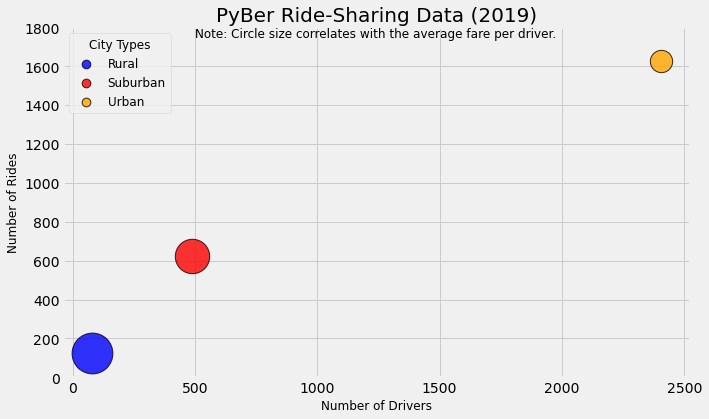

<Figure size 432x288 with 0 Axes>

In [23]:
# Create a scatter plot that shows # of drivers vs # of rides
# use the average fares per driver as the size of the circles 
# this shows that where the # of drivers (i.e. supply) exceeds the # of rides (i.e. demand) avg fare per driver drops
# in other words, each driver is generating less income, those "excess" drivers are not "needed"

rural_driver_size = rural_df["Average Fare per Driver"]
suburban_driver_size = suburban_df["Average Fare per Driver"]
urban_driver_size = urban_df["Average Fare per Driver"]

plt.subplots(figsize=(10, 6))
plt.scatter(rural_df["Total Drivers"],
      rural_df["Total Rides"],
      s=30*rural_driver_size, c="blue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.scatter(suburban_df["Total Drivers"],
      suburban_df["Total Rides"],
      s=30*suburban_driver_size, c="red",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(urban_df["Total Drivers"],
      urban_df["Total Rides"],
      s=30*urban_driver_size, c="orange",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# Create y limit, title, axis names, and add a grid
plt.ylim(0,1800)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Number of Rides", fontsize=12)
plt.xlabel("Number of Drivers", fontsize=12)
plt.grid(True)

# Add the legend.
# plt.legend()

# Create a better legend
# first we will create a variable to store the fuction plt.legend
# within here we set:
    # the font size
    # mode to define how the area is fitted
    # scatterpoint to define how many points show up on the legend 
    # loc to define where to place the legend
    # title to create a title for this legend 
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
# using .legendhandles we reference the index of the legend and define the size of the markers/circles in the legend 
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# here we change the font size of the legend title text 
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size, the first 2 #s correspond with the x and y location on the figure)
plt.text(500, 1750, "Note: Circle size correlates with the average fare per driver.", fontsize="12")

# Show the plot
plt.show()

# Save the figure
plt.savefig('analysis/DriveRidesRatio_AvgFareDrivers')

## Pie Charts - to show % BreakDown

In [24]:
# Create a pie chart for % of total fares and % of rides by city type
# what we'd expect to see is that the % are closely matched to show that equal input generates equal output 

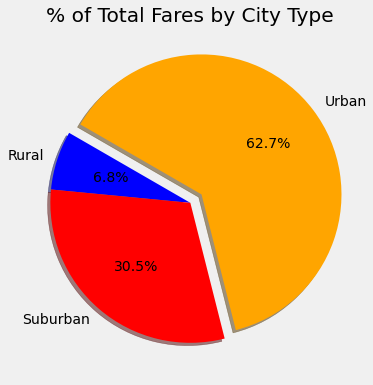

<Figure size 432x288 with 0 Axes>

In [25]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()

# Calculate the percentage of fare for each city type.
fare_type_percents = 100 * sum_fares_by_type / total_fares

# Import mpl to change the plot configurations using rcParams since pie charts don't have a paramater for font size naturally
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(fare_type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["blue", "red", "orange"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Show Figure
plt.show()

# Save the Figure
plt.savefig('analysis/Total_Fares_by_City_Type')

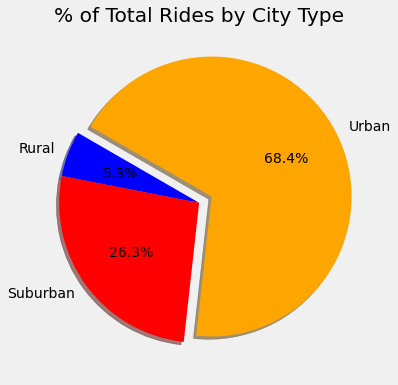

<Figure size 432x288 with 0 Axes>

In [26]:
# Get the sum of the fares for each city type.
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

# Get the sum of all the fares.
total_rides = pyber_data_df["ride_id"].count()

# Calculate the percentage of fare for each city type.
ride_type_percents = 100 * sum_rides_by_type / total_rides

# Import mpl to change the plot configurations using rcParams since pie charts don't have a paramater for font size naturally
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["blue", "red", "orange"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
#plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

# Save the Figure
plt.savefig('analysis/Total_Rides_by_City_Type')